# Simulation and Risk Homework 2
***
*Ryan Weisner, February 11th, 2020*  

## Assignment
### Year 0 Expenses (i.e., fixed costs), costs that occur before oil production begins
- Need to purchase seismic data and leases for the right to drill in the land
    - Leases
        - $ Acres_w \sim N(\mu = 600, \sigma = 60) $
        - $ Cost\:per\:acre = 960$
        
    - Seismic data
        - $ Seismic\:sections_w \sim N(\mu = 3, \sigma = .35) $
        - $ Cost\:per\:section = 43,000 $

- Completition costs
    - If there is oil present: $ Completion\:Cost_w \sim N(\mu = 390000, \sigma = 50000) $

- Professional Overhead (**annual**)
    - Depends on time spent on the well
    - $ Overhead_{t=0, w} \sim tri(min = 172000, mean = 215000, max = 279500) $
    - If the well isn't dry, then this cost is incurred for each year $ t $

## Production Risk
- How many barrels of oil can be produced per year? How will this production rate decline over time?  

$$ production\:rate_{t+1, w} = (1 - decline\:rate_w) * (production\:rate_{t, w}) $$

$$ decline\:rate_w \sim Uniform(.15,.32) $$

$$ oil_{t, w} = 365 * \frac{production\:rate_{t,w} + production\:rate_{t+1,w}}{2} $$

$$ oil_{t=1, w} = 365 * production\:rate_{t=1, w} $$

$$ production\:rate_{t=1, w} \sim LogN(\mu = 153,300\:, \sigma = \:\:43,800) $$

$$ corr(production\:rate_{t=1, w}, decline\:rate_w) = .64 $$

where $ \frac{production\:rate_t + production\:rate_{t+1}}{2} $ is simply the average production rate for year $ t $  
  
- The decline rate will remain constant **for each well**, but each will have its own decline rate
- the production for year 1 is follows a lognormal distribution with a mean of (420 * 365) = 153.3k and std of (120 * 365) = 43.8k

## Revenue Risk 
- **use the price projections file to to create triangle distribution** 

$$ Revenue_t = price_t * oil_t $$
$$ oil_t = \sum_{w=1}^{W} oil_{t,w} $$
$$ Total\:Rev_t = Revenue_t*NRI_t$$
$$ NRI \sim N(\mu = .75, \sigma = .02) $$ 

## Operating Expenses
$$ OC_t \sim N(\mu = 2.25, \sigma = .30) $$

Annual Operating Costs for all wells in year $ t $  
$\sum_{w=1}^{W} oil_{t,w}$ is number of barrels produced

$$ Annual\:OC_t = OC_t * \sum_{w=1}^{W} oil_{t,w} $$  

Taxes 
$$ Taxes = Total\:Rev_t * .046 $$

Final Net Revenue
$$FNR_t = Total\:Rev_t - Taxes_t - Annual\:OC_t $$

## Net Present Value Calculation 

$$ NPV = -Initial\:Costs + \frac{FNR_t}{1 + WACC} + \frac{FNR_{t+1}}{(1 + WACC)^2} + \dots $$


$$ WACC = .1 $$

## Load data

In [2]:
# load data

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
np.random.seed(69)
import statistics
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

# import data, drop unnecessary years, and set variable types
df = pd.read_csv('drill_costs.csv')
df = df[(df['date'] > 1990) & (df['date'] != 2007)]
df = df.reset_index(drop=True)
df['avg_dx_oil_gas_well'] = df['avg_dx_oil_gas_well'].astype(float)
df['dx_gas'] = df['dx_gas'].astype(float)
df['dx_oil'] = df['dx_oil'].astype(float)
df['dx_well'] = df['dx_well'].astype(float)
df_cost = df

df_price = pd.read_csv('oil_price_projections.csv')
df_price = df_price[(df_price['year'] <= 2035) & (df_price['year'] != 2020)]
df_price = df_price.reset_index(drop=True)

df_cost
df_price

,date,oil_k,gas_k,well_k,dx_oil,dx_gas,dx_well,avg_dx_oil_gas_well
0,1991,346.90,506.60,441.20,0.08,0.07,0.20,0.12
1,1992,362.30,426.10,357.60,0.04,-0.16,-0.19,-0.10
2,1993,356.60,521.20,387.70,-0.02,0.22,0.08,0.10
3,1994,409.50,535.10,491.50,0.15,0.03,0.27,0.15
4,1995,415.80,629.70,481.20,0.02,0.18,-0.02,0.06
5,1996,341.00,616.00,541.00,-0.18,-0.02,0.12,-0.03
6,1997,445.60,728.60,655.60,0.31,0.18,0.21,0.23
7,1998,566.00,815.60,973.20,0.27,0.12,0.48,0.29
8,1999,783.00,798.40,1115.50,0.38,-0.02,0.15,0.17
9,2000,593.40,756.90,1075.40,-0.24,-0.05,-0.04,-0.11


,year,high_oil_price,low_oil_price,ref_oil_price
0,2021,135.53,25.29,69.90
1,2022,144.16,25.50,72.68
2,2023,150.80,26.15,74.80
3,2024,157.06,26.62,75.94
4,2025,162.42,26.99,77.02
5,2026,157.90,26.48,77.18
6,2027,164.09,26.90,77.45
7,2028,165.25,27.59,78.72
8,2029,171.67,28.11,80.20
9,2030,173.03,28.64,81.34


### Preliminary functions for the KDE drill cost distribution

In [3]:
# function for generating kde
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def kde_sample(x, x_grid, n, bandwidth=.02):
    """return random sample from KDE"""
    kde_skl = KernelDensity(bandwidth=bandwidth)
    kde_skl.fit(x[:, np.newaxis])
    sample = kde_skl.sample(n_samples = n)
    return(sample)

In [7]:
def drill_cost_sim(sim_size, bandwidth = .0521, 
               t_min1 = -.22, t_mean1 = -.0917, t_max1 = -.07,
               t_min2 = .02, t_mean2 = .05, t_max2 = .06):
    '''Simulate distribution of drilling costs for 2020 using the KDE for 2008-2012.'''

    from sklearn.neighbors import KernelDensity
    from scipy.stats import gaussian_kde
        
    sim_size = sim_size*2
    
    # average cost for 2006
    cost_t0 = np.mean(
    df[['oil_k','gas_k', 'well_k']][df['date'] == 2006].values)

    # input variables
    ls = [df['dx_gas'], df['dx_oil'], df['dx_well']]
    x = [item for sublist in ls for item in sublist] # get all columns values into a flat list
        
    # for kde sampling    
    x_d = np.linspace(-.5, .5, 100000)  
    x = np.array(x) 
    
    # 2007
    dx = kde_sample(x, x_d, n = sim_size, bandwidth=bandwidth)
    cost_t = cost_t0*(1+dx)
    
    for i in range(2008,2013):            
        dx = kde_sample(x, x_d, n = sim_size, bandwidth = bandwidth)
        cost_t = cost_t*(1+dx)
    
    for i in range(2013, 2016):
        dx = np.random.triangular(left = t_min1, mode = t_mean1, right = t_max1, size = sim_size)
        dx = np.array([[item] for item in dx])
        cost_t = cost_t*(1+dx) 
        
    for i in range(2016, 2021):
        dx = np.random.triangular(left = t_min2, mode = t_mean2, right = t_max2, size = sim_size)
        dx = np.array([[item] for item in dx])
        cost_t = cost_t*(1+dx) 
    
    return(cost_t.flatten())

In [8]:
def get_drill_cost_vec(kde_values, sim_size):
    '''Draw a sample from the KDE to be used as the drilling cost.'''
    
    import random
    samp = random.sample(kde_values, k = sim_size)
    samp = np.array(samp)
    samp = samp.flatten()
    
    return(samp)

# Simulate Cost of Single Dry Well
$$ cost_{dry} = acres(960) + sections(43000) + overhead + drilling\:cost_{2006} $$

$$ acres_w \sim N(\mu = 600, \sigma = 60) $$    

$$ sections_w \sim N(\mu = 3, \sigma = .35) $$ 

$$ Overhead_{t=0, w} \sim tri(min = 172000, mean = 215000, max = 279500) $$

## Dry Well simulation (vectors)

In [9]:
def sim_dry_vec(sim_size):
    drill_cost_dist = drill_cost_sim(sim_size)
    drill_cost_dist = list(drill_cost_dist)
    
    # unit costs
    cost_per_acre = 960
    cost_per_section = 43000
    
    # simulate (overhead will need to be added for future years as well)
    n_acres = np.random.normal(600, 60, size = sim_size) 
    n_sections = np.random.normal(3, .35, size = sim_size) 
    overhead = np.random.triangular(left = 172000, mode = 215000, right = 279500, size = sim_size)
    
    # sample from the KDE distribution and use this as the drilling cost
    cost_drilling = get_drill_cost_vec(drill_cost_dist, sim_size) * 1000 # multiply by 1000 since these numbers are in thousands of dollars
    
    total_cost_acre = cost_per_acre * n_acres
    total_cost_section = cost_per_section * n_sections
        
    final_cost = (total_cost_acre + total_cost_section + overhead + cost_drilling)
        
    return(final_cost)

,0.01,0.05,0.25,0.50,0.75,0.95,0.99
0,2250815.17,2729444.30,3676588.19,4578586.18,5729320.92,7937723.17,9972721.93


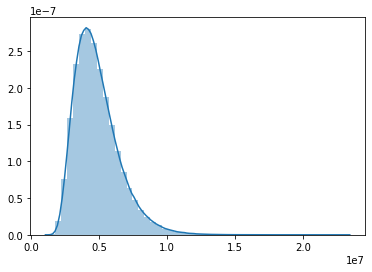

In [10]:
# run simulation and plot values
dry = sim_dry_vec(1000000)

import seaborn as sns
sns.distplot(dry);

q = [.01, .05, .25, .5, .75, .95, .99]
pd.DataFrame(np.quantile(dry, q), index = q).T

## Dry well simulation (loops)

In [ ]:
# define dry simulation function

def sim_dry():
    # simulate the distribution of 2020 drilling costs with the KDE
    kde_values = simulate_kde()
    
    # unit costs
    cost_per_acre = 960
    cost_per_section = 43000
    
    # simulate
    cost_lst = []
    for i in range(10000):
        n_acres = np.random.normal(600, 60) 
        n_sections = np.random.normal(3, .35) 
        overhead = np.random.triangular(left = 172000, mode = 215000, right = 279500)
        
        # sample from the KDE distribution and use this as the drilling cost
        cost_drilling = get_drill_cost(kde_values) * 1000
    
        total_cost_acre = cost_per_acre * n_acres
        total_cost_section = cost_per_section * n_sections
        
        final_cost = total_cost_acre + total_cost_section + overhead + cost_drilling
        
        cost_lst.append(final_cost)
        
    return(cost_lst)   

# run simulation and plot values
dry = sim_dry()

import seaborn as sns
sns.distplot(dry);

q = [.01, .05, .25, .5, .75, .95, .99]
pd.DataFrame(np.quantile(dry, q), index = q).T

# Simulate NPV of Single Wet Well (vectorized)

In [11]:
def initial_cost_vec(kde_values, sim_size):
    # year 0 costs
    
    # unit costs
    cost_per_acre = 960
    cost_per_section = 43000
    
    # simulate (overhead will need to be added for future years as well)
    n_acres = np.random.normal(600, 50, size = sim_size) 
    n_sections = np.random.normal(3, .35, size = sim_size) 
    overhead = np.random.triangular(left = 172000, mode = 215000, right = 279500, size = sim_size)
    cost_completion = np.random.normal(390000, 50000, size = sim_size)
    
    # sample from the KDE distribution and use this as the drilling cost
    cost_drilling = get_drill_cost_vec(kde_values, sim_size) * 1000 # multiply by 1000 since these numbers are in thousands of dollars
    
    total_cost_acre = cost_per_acre * n_acres
    total_cost_section = cost_per_section * n_sections
        
    final_cost = (total_cost_acre + total_cost_section + overhead + cost_drilling + cost_completion)
        
    return(final_cost)

In [12]:
def get_rates_vec(sim_size):
    '''Returns a random sample of size n = 1 from the population of
    correlated initial production rates and decline rates 
    '''
    # functions and matrices for chol decomp later
    def standardize(x):
        x_std = (x - x.mean())/x.std()
        return(x_std)

    def destandardize(x_std, x):
        x_old = (x_std * x.std()) + x.mean()
        return(x_old)
    
    r = np.array([[1, .64], [.64, 1]]) # correlation matrix
    u = np.linalg.cholesky(r)
    
    init_rate = np.random.lognormal(6, .28, size = sim_size) # barrels/day

    # decline rate
    dec_rate = np.random.uniform(.15, .32, size = sim_size)

    # make init_rate and dec_rate correlated (.64)
    both_rates = [standardize(dec_rate), standardize(init_rate)]
    id_rate = np.dot(u, both_rates).T

    final_id_rate = np.array([[destandardize(id_rate[:, 0], dec_rate)],
                         [destandardize(id_rate[:, 1], init_rate)]])
    final_id_rate = final_id_rate.squeeze()
    
    return(final_id_rate)

In [13]:
def get_price_vec(year, sim_size):
    '''Return the price of oil from the specified year'''
    df_cols = df_price[['high_oil_price', 'low_oil_price', 'ref_oil_price']]
    
    prices = df_cols[df_price['year'] == year].values
    price = np.random.triangular(right = prices[0][0], left = prices[0][1], mode = prices[0][2], size = sim_size)
    
    return(price)

In [14]:
def n_barrels_matrix(sim_size):
    '''Returns a simulated matrix. Number of columns = number of simulations,
    number of rows = number of years (i.e., there will be 15 rows). 
    '''    
    
    # calculate the initial production rate and decline rate
    dec_rate, ip_rate = get_rates_vec(sim_size)
    annual_rate = 365 * ip_rate
    
    first_year = []
    first_year.append(annual_rate) # barrels produced in 1st year
    
    avg_prod_lst = []
        
    for j in range(14):
        annual_rate_t0 = annual_rate
        annual_rate = annual_rate*(1-dec_rate)
        
        avg_production = (annual_rate_t0 + annual_rate) / 2
        avg_prod_lst.append(avg_production)
        
    matrix = np.array(first_year + avg_prod_lst)
    
    return(matrix)

In [15]:
def get_annual_rev_matrix(sim_size):
    ''' Return matrix of simulated total annual revenue for years 2021-2035
            nrows = number of years
            ncols = number of simulations
    '''
    barrels = n_barrels_matrix(sim_size) # matrix containing oil produced for each year 
    
    rev = []
    
    n = 0
    for i in range(2021, 2036):
        # initial revenue
        price = get_price_vec(i, sim_size) # price for year i
        quantity = barrels[n, :] # quantity for year i 
        revenue = price * quantity
        
        # overhead 
        overhead = np.random.triangular(left = 172000, mode = 215000, right = 279500, size = sim_size)
        revenue = revenue - overhead
        
        # nri
        nri_rate = np.random.normal(.75, .02, size = sim_size)
        revenue_post_nri = revenue * nri_rate
        
        # tax
        revenue_post_tax = revenue_post_nri*(1-.046)
        
        # operating expenses
        oc_per_barrel = np.random.normal(2.25, .3, size = sim_size)
        annual_oc = oc_per_barrel * quantity
        
        # total revenue 
        total_rev = revenue_post_tax - annual_oc
        
        rev.append(total_rev)
        
        n += 1
        
    rev = np.array(rev)
    
    return(rev)

In [16]:
def sim_wet_npv_vec(sim_size):
    '''Return vector of simulated NPVs, dimension of vector is [sim_size x 1]'''
    
    kde_values = drill_cost_sim(sim_size)
    kde_values = list(kde_values)
    
    initial_c = initial_cost_vec(kde_values, sim_size)
    fnr = get_annual_rev_matrix(sim_size)
    
    weighted_fnr_total = 0
    n = 0 
    for i in range(1, 16):
        weighted_fnr = fnr[n, :] / (1.1)**i
        weighted_fnr_total += weighted_fnr
        n += 1
        
    npv = np.array(weighted_fnr_total - initial_c)
    
    return(npv)

In [18]:
# run 1 million simulations

vals = sim_wet_npv_vec(1000000)

q = [.01, .05, .25, .5, .75, .95, .99]
pd.DataFrame(np.quantile(vals, q), index = q).T

,0.01,0.05,0.25,0.50,0.75,0.95,0.99
0,7050104.66,10825395.64,16726403.54,21381134.92,26726316.77,36119026.52,44498438.31


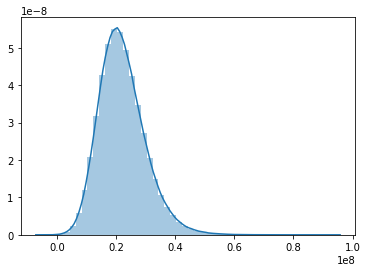

In [19]:
import seaborn as sns
sns.distplot(vals)

# Simulate NPV of Single Wet Well (loops)

In [ ]:
def initial_cost(kde_values):
    # year 0 costs
    
    # unit costs
    cost_per_acre = 960
    cost_per_section = 43000
    
    # simulate (overhead will need to be added for future years as well)
    n_acres = np.random.normal(600, 60) 
    n_sections = np.random.normal(3, .35) 
    overhead = np.random.triangular(left = 172000, mode = 215000, right = 279500)
    cost_completion = np.random.normal(390000, 50000)
    
    # sample from the KDE distribution and use this as the drilling cost
    cost_drilling = get_drill_cost(kde_values) * 1000 # multiply by 1000 since these numbers are in thousands of dollars
    
    total_cost_acre = cost_per_acre * n_acres
    total_cost_section = cost_per_section * n_sections
        
    final_cost = (total_cost_acre + total_cost_section + overhead + cost_drilling +
                 cost_completion)
        
    return(final_cost)

In [ ]:
def get_rates():
    '''Returns a random sample of size n = 1 from the population of
    correlated initial production rates and decline rates 
    '''
    # functions and matrices for chol decomp later
    def standardize(x):
        x_std = (x - x.mean())/x.std()
        return(x_std)

    def destandardize(x_std, x):
        x_old = (x_std * x.std()) + x.mean()
        return(x_old)
    
    r = np.array([[1, .64], [.64, 1]]) # correlation matrix
    u = np.linalg.cholesky(r)
    
    init_rate = np.random.lognormal(6, .28, 100000) # barrels/day

    # decline rate
    dec_rate = np.random.uniform(.15, .32, 100000)

    # make init_rate and dec_rate correlated (.64)
    both_rates = [standardize(init_rate), standardize(dec_rate)]
    id_rate = np.dot(u, both_rates).T

    final_id_rate = np.array([[destandardize(id_rate[:, 0], init_rate)],
                         [destandardize(id_rate[:, 1], dec_rate)]])
    final_id_rate = final_id_rate.squeeze()
        
    # sample from the correlated 'population' 
    import random
    samp = random.sample(list(final_id_rate.T), k = 1)
    samp = [item for sublist in samp for item in sublist] # flatten list
        
    return(samp)

In [ ]:
def n_barrels():
    '''Returns a simulated list of the number of barrels of oil produced for
    each year during the 15 year period. 
    '''    
    barrels_produced = []
    
    # calculate the initial production rate and decline rate
    ip_rate, dec_rate = get_rates()
    annual_rate = 365 * ip_rate
    barrels_produced.append(annual_rate) # barrels produced in 1st year
        
    for j in range(14):
        annual_rate_t0 = annual_rate
        annual_rate = annual_rate*(1-dec_rate)
        avg_production = np.mean([annual_rate_t0, annual_rate])
        barrels_produced.append(avg_production)
        
    return(barrels_produced) 

In [ ]:
def get_price(year):
    '''Return the price of oil from the specified year'''
    df_cols = df_price[['high_oil_price', 'low_oil_price', 'ref_oil_price']]
    
    prices = df_cols[df_price['year'] == year].values
    price = np.random.triangular(right = prices[0][0], left = prices[0][1], mode = prices[0][2])
    
    return(price)

In [ ]:
def get_annual_rev():
    ''' Return total annual revenue for years 2021-2035'''
    barrels = n_barrels() # list containing oil produced for each year 
    
    rev = []
    
    n = 0
    for i in range(2021, 2036):
        # initial revenue
        price = get_price(i) # price for year i
        quantity = barrels[n] # quantity for year i 
        revenue = price * quantity
        
        # overhead 
        overhead = np.random.triangular(left = 172000, mode = 215000, right = 279500)
        revenue = revenue - overhead
        
        # nri
        nri_rate = np.random.normal(.75, .02)
        revenue_post_nri = revenue * nri_rate
        
        # tax
        revenue_post_tax = revenue_post_nri*(1-.046)
        
        # operating expenses
        oc_per_barrel = np.random.normal(2.25, .3)
        annual_oc = oc_per_barrel * quantity
        
        # total revenue 
        total_rev = revenue_post_tax - annual_oc
        
        rev.append(total_rev)
        
        n += 1
        
    return(rev)

In [ ]:
def sim_wet_npv(reps):
    kde_values = simulate_kde()
    npv = []
    
    from tqdm import tqdm # show progress bar
    for i in tqdm(range(reps)):
        initial_c = initial_cost(kde_values = kde_values)
        fnr = get_annual_rev()
        
        weighted_fnr_total = 0
        n = 0
        for j in range(1, 16):
            weighted_fnr = fnr[n] / (1.1)**j
            weighted_fnr_total += weighted_fnr
            #print('fnr[n]:', fnr[n])
            #print('weighted_fnr:', weighted_fnr, '\n')
            n += 1
            
        weighted_fnr_total = weighted_fnr_total - initial_c
        
        npv.append(weighted_fnr_total)
        # print(weighted_fnr_total)
        
    return(npv)

In [ ]:
test = sim_wet_npv(100)

In [ ]:
q = [.01, .05, .25, .5, .75, .95, .99]
pd.DataFrame(np.quantile(test, q), index = q).T

In [ ]:
sns.distplot(test)

In [ ]:
sim_wet_npv(5)

## Demonstrating how Chol Decomp works

In [ ]:
# functions and matrices for chol decomp later
def standardize(x):
    x_std = (x - x.mean())/x.std()
    return(x_std)

def destandardize(x_std, x):
    x_old = (x_std * x.std()) + x.mean()
    return(x_old)

r = np.array([[1, .64], [.64, 1]]) # correlation matrix
u = np.linalg.cholesky(r)

init_rate = np.random.lognormal(6, .28, 100000) # barrels/day

# decline rate
dec_rate = np.random.uniform(.15, .32, 100000)

# make init_rate and dec_rate correlated (.64)
both_rates = [standardize(init_rate), standardize(dec_rate)]
id_rate = np.dot(u, both_rates).T

final_id_rate = np.array([[destandardize(id_rate[:, 0], init_rate)],
                         [destandardize(id_rate[:, 1], dec_rate)]])
final_id_rate = final_id_rate.squeeze()

# display newly correlated init_rate and dec_rate
pd.DataFrame(final_id_rate, index = ['BOPD', 'dec_rate']).T.head()

print('Correlation Matrix\n------------\n', np.corrcoef(final_id_rate))